## Rep 5. KNN분류 및 로지스틱회귀
### 202045062 김수민

- Kaggle에서 분류 관련 데이터셋을 구해서, 2진분류와 다중분류를, 교재에 흐름대로 실습한 결과물

이진분류
- train.csv : 학습 데이터
- id : 식별 고유값
- fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
- volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
- citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
- residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
- chlorides : 염소화물: 와인의 염분량
- free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
- total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
- density : 밀도: 알코올 및 당 함량에 따라 변함
- pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
- sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
- alcohol : 와인의 알코올 함량 백분율
- type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
- quality : 맛으로 평가된 와인의 품질

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [142]:
df = pd.read_csv("./data/train.csv")
df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


In [143]:
df = df.drop(["id","quality"], axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white
1,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white
2,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white
3,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white
4,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red
...,...,...,...,...,...,...,...,...,...,...,...,...
3226,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white
3227,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white
3228,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white
3229,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white


- 총14개의 컬럼
- type컬럼은 white와 red 와인 구별
  1. white와 red 라벨 인코딩
  2. 데이터 분리
  3. 모델 생성 및 평가 
  4. 해석

In [115]:
# 라벨 인코딩 및 스케일
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

col = df[['fixed acidity' , 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']]
ss = StandardScaler()
df_scale = ss.fit_transform(col)
df[['fixed acidity' , 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']] = df_scale
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873,1
1,0.227151,0.274102,-0.202257,-0.115217,-0.976867,0.426604,-0.058413,-1.443438,-0.828960,-0.343803,2.096877,1
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986,1
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137,1
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423,1
3227,-0.622077,-0.973871,-0.270829,2.407962,-0.248903,1.289444,0.407951,0.842646,0.221405,-1.212420,0.002423,1
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250,1
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423,1


In [117]:
# 데이터 지정
train_input = df[['fixed acidity' , 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']].to_numpy()
train_taget = df['type'].to_numpy()

# test train
train_input, test_input, train_taget, test_taget = train_test_split(
  train_input, train_taget, random_state=42 
)

In [135]:
# 모델 생성 및 훈련
lr = LogisticRegression()
lr.fit(train_input, train_taget)
print(f'훈련 데이터 점수: {lr.score(train_input, train_taget)}       테스트 데이터 점수{lr.score(test_input, test_taget)}')

# 확률과 실제 값 확인
print('라벨로 확인 :',lr.predict(test_input[:5])) # 1이면 화이트 와인 0이면 레드와인

# 확률 보기
print('확률로 판단:\n',lr.predict_proba(test_input[:5])) # 확률이 더 큰쪽으로 예측

# decision_function은 z값만으로 판단가능(양수 음수)
print('양수 음수로 판단(음수면 red와인) :',lr.decision_function(test_input[:5]))


훈련 데이터 점수: 0.9925711927362774       테스트 데이터 점수0.9987623762376238
라벨로 확인 : [1 1 1 1 0]
확률로 판단:
 [[2.64660420e-05 9.99973534e-01]
 [1.16778756e-02 9.88322124e-01]
 [1.40436974e-03 9.98595630e-01]
 [2.41624757e-03 9.97583752e-01]
 [9.99602994e-01 3.97005890e-04]]
양수 음수로 판단(음수면 red와인) : [10.53962161  4.43831261  6.5667613   6.02312036 -7.83116236]


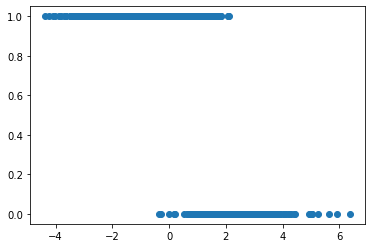

In [140]:
# 그래프
# 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_input = pca.fit_transform(train_input)
plt.scatter(pca_input, train_taget)

다중 분류

- 등급으로 다중분류
- 4 ~ 8 등급으로 분류 총5개
- 데이터 전처리
- 데이터 선정
- 모델 생성 및 평가
- 해석 및 소프트 맥스

In [155]:
# 등급이 몇개가 있는지 확인
df = pd.read_csv("./data/train.csv")
df_g = df.groupby(df['quality'])
df_g.size()

quality
4     108
5    1069
6    1418
7     539
8      97
dtype: int64

In [158]:
# 데이터 지정
train_input = df[['fixed acidity' , 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']].to_numpy()
train_taget = df['quality'].to_numpy()

# test train
train_input, test_input, train_taget, test_taget = train_test_split(
  train_input, train_taget, random_state=42 
)

In [172]:
# 다중 분류 5가지로 분류
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_input, train_taget)
print(f'훈련 데이터 점수: {lr.score(train_input, train_taget)}       테스트 데이터 점수{lr.score(test_input, test_taget)}')
print('분류 라벨 : ',lr.classes_)

# 10개 값의 확률 및 실제값 보기
proba = lr.predict_proba(test_input[:10])
# 확률과 실제 값 확인
print('예측 라벨 :',lr.predict(test_input[:5]))
print('예측 확률 : \n',np.round(proba, decimals =3))

lr.coef_, lr.intercept_
# z값은 무한대로 확률을 위해 5가지 z값 총합을 0~1사이로 변경이 필요하다 -> 소프트맥스

훈련 데이터 점수: 0.553446141147338       테스트 데이터 점수0.5247524752475248
분류 라벨 :  [4 5 6 7 8]
예측 라벨 : [6 6 5 5 5]
예측 확률 : 
 [[0.008 0.303 0.574 0.094 0.02 ]
 [0.015 0.145 0.562 0.243 0.034]
 [0.047 0.493 0.366 0.08  0.014]
 [0.1   0.517 0.327 0.05  0.006]
 [0.05  0.558 0.32  0.064 0.009]
 [0.055 0.871 0.066 0.006 0.001]
 [0.014 0.413 0.478 0.078 0.018]
 [0.011 0.037 0.42  0.428 0.105]
 [0.041 0.483 0.367 0.089 0.021]
 [0.028 0.118 0.596 0.227 0.031]]


C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[ 1.87210639e-01,  1.45595770e+00, -6.65609238e-01,
         -5.79704307e-02, -2.00098981e-02, -4.76556255e-02,
          9.90149151e-03,  2.26645754e-01,  5.24010406e-01,
         -4.70381125e-01, -4.10074869e-01],
        [ 1.56353062e-01,  2.57584717e+00,  2.81456440e-01,
         -2.34320630e-02,  3.71975753e-01, -3.64888158e-04,
          5.44658122e-03,  1.17908544e+00,  1.37662608e+00,
         -6.69765735e-01, -7.61927118e-01],
        [ 6.08476990e-02, -1.40072035e+00, -6.13823534e-02,
          2.72409706e-02,  4.54039210e-02,  8.28566963e-03,
         -3.02680509e-03,  2.88392770e-02,  3.90609960e-01,
          1.65139358e-01,  1.58571197e-02],
        [-7.79301374e-02, -1.97160896e+00,  1.65836069e-01,
          2.33160092e-02, -2.86661783e-01,  1.71344289e-02,
         -7.02622085e-03, -9.24494335e-01, -8.58096013e-01,
          1.22146170e+00,  5.36909219e-01],
        [-3.26481262e-01, -6.59475560e-01,  2.79699083e-01,
          3.08455139e-02, -1.10707993e-01,  

In [177]:
# 소프트 맥스
# Z 값을 계산해서 z1~z5까지 구함

# test의 10개까지만 Z값으로 계산
decisions = lr.decision_function(test_input[:10])

# 5개의 z 값
print('z값 : \n', np.round(decisions, decimals=2),'\n')

# z값을 소프트맥수로 합이 1이 되도록 변환
from scipy.special import softmax

# 각 행별로 소프트 맥스 계산
proba = softmax(decisions, axis=1)
print('소프트맥스 값 : \n',np.round(proba, decimals=3))


z값 : 
 [[-2.26  1.38  2.01  0.21 -1.34]
 [-1.88  0.36  1.72  0.88 -1.08]
 [-0.74  1.61  1.31 -0.2  -1.98]
 [ 0.13  1.77  1.31 -0.56 -2.65]
 [-0.56  1.86  1.3  -0.31 -2.28]
 [ 0.57  3.33  0.76 -1.58 -3.08]
 [-1.8   1.62  1.76 -0.05 -1.53]
 [-2.17 -0.94  1.49  1.51  0.11]
 [-0.95  1.51  1.24 -0.18 -1.62]
 [-1.34  0.1   1.72  0.76 -1.24]] 

소프트맥스 값 : 
 [[0.008 0.303 0.574 0.094 0.02 ]
 [0.015 0.145 0.562 0.243 0.034]
 [0.047 0.493 0.366 0.08  0.014]
 [0.1   0.517 0.327 0.05  0.006]
 [0.05  0.558 0.32  0.064 0.009]
 [0.055 0.871 0.066 0.006 0.001]
 [0.014 0.413 0.478 0.078 0.018]
 [0.011 0.037 0.42  0.428 0.105]
 [0.041 0.483 0.367 0.089 0.021]
 [0.028 0.118 0.596 0.227 0.031]]
